# STEP 1 

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mwinilunga zm
mys shmidta ru
araouane ml
kavaratti in
chokurdakh ru
nanortalik gl
nouadhibou mr
barrow us
praia cv
caraballeda ve
raffadali it
busselton au
paita pe
carnarvon au
hamilton bm
upernavik gl
eskasem af
yaan cn
raudeberg no
rikitea pf
qaanaaq gl
tsihombe mg
airai pw
rikitea pf
norman wells ca
busselton au
whitecourt ca
srednekolymsk ru
saskylakh ru
hobart au
bengkulu id
mount isa au
albany au
warrington us
santa cruz cr
paita pe
san quintin mx
mecca sa
saint-philippe re
puerto ayora ec
saskylakh ru
amderma ru
dikson ru
emba kz
yellowknife ca
broome au
rikitea pf
araouane ml
chokurdakh ru
ushuaia ar
sungairaya id
abalak ne
tasiilaq gl
matir tn
taolanaro mg
geraldton au
clyde river ca
antofagasta cl
jamestown sh
jamestown sh
labranzagrande co
vila franca do campo pt
victoria sc
bilibino ru
egvekinot ru
utica us
touros br
albany au
luderitz na
sentyabrskiy ru
nikolskoye ru
cabo san lucas mx
borazjan ir
cabo san lucas mx
sentyabrskiy ru
guerrero negro mx
floresta br
dikson ru
pu

In [6]:
# Create a list for holding the cities.
cities = []


# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
#Import dependencies continued...
from citipy import citipy
import requests
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | mwinilunga
Processing Record 2 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 12 | araouane
Processing Record 4 of Set 12 | kavaratti
Processing Record 5 of Set 12 | chokurdakh
Processing Record 6 of Set 12 | nanortalik
Processing Record 7 of Set 12 | nouadhibou
Processing Record 8 of Set 12 | barrow
Processing Record 9 of Set 12 | praia
Processing Record 10 of Set 12 | caraballeda
Processing Record 11 of Set 12 | raffadali
Processing Record 12 of Set 12 | busselton
Processing Record 13 of Set 12 | paita
Processing Record 14 of Set 12 | carnarvon
Processing Record 15 of Set 12 | hamilton
Processing Record 16 of Set 12 | upernavik
Processing Record 17 of Set 12 | eskasem
City not found. Skipping...
Processing Record 18 of Set 12 | yaan
Processing Record 19 of Set 12 | raudeberg
Processing Record 20 of Set 12 | rikitea
Processing Record 21 of Set 12 | qaanaaq
Processing Record 22 of Set 12 | tsihombe
City not found. Skipping

In [12]:
# After collecting all our data, we can tally the number of cities 
len(city_data)

525

In [13]:
# Next, we will use df = pd.DataFrame(list with dictionaries)

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mwinilunga,-11.7358,24.4293,63.00,86,94,2.75,ZM,2021-04-25 21:47:15
1,Araouane,18.9048,-3.5265,91.85,12,56,6.55,ML,2021-04-25 21:47:15
2,Kavaratti,10.5669,72.6420,83.71,72,2,6.73,IN,2021-04-25 21:47:16
3,Chokurdakh,70.6333,147.9167,21.02,94,100,13.98,RU,2021-04-25 21:47:16
4,Nanortalik,60.1432,-45.2371,41.14,80,100,15.26,GL,2021-04-25 21:47:17
5,Nouadhibou,20.9310,-17.0347,66.20,82,0,14.97,MR,2021-04-25 21:47:17
6,Barrow,71.2906,-156.7887,21.92,91,28,15.79,US,2021-04-25 21:45:01
7,Praia,14.9215,-23.5087,71.60,73,75,17.27,CV,2021-04-25 21:43:43
8,Caraballeda,10.6112,-66.8522,86.00,70,43,4.61,VE,2021-04-25 21:47:18
9,Raffadali,37.4036,13.5331,45.00,89,15,3.96,IT,2021-04-25 21:47:18


In [14]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mwinilunga,ZM,2021-04-25 21:47:15,-11.7358,24.4293,63.00,86,94,2.75
1,Araouane,ML,2021-04-25 21:47:15,18.9048,-3.5265,91.85,12,56,6.55
2,Kavaratti,IN,2021-04-25 21:47:16,10.5669,72.6420,83.71,72,2,6.73
3,Chokurdakh,RU,2021-04-25 21:47:16,70.6333,147.9167,21.02,94,100,13.98
4,Nanortalik,GL,2021-04-25 21:47:17,60.1432,-45.2371,41.14,80,100,15.26
5,Nouadhibou,MR,2021-04-25 21:47:17,20.9310,-17.0347,66.20,82,0,14.97
6,Barrow,US,2021-04-25 21:45:01,71.2906,-156.7887,21.92,91,28,15.79
7,Praia,CV,2021-04-25 21:43:43,14.9215,-23.5087,71.60,73,75,17.27
8,Caraballeda,VE,2021-04-25 21:47:18,10.6112,-66.8522,86.00,70,43,4.61
9,Raffadali,IT,2021-04-25 21:47:18,37.4036,13.5331,45.00,89,15,3.96


In [15]:
# Create the output file (CSV).
output_data_file = "/Users/angelica_villanueva/Downloads/weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

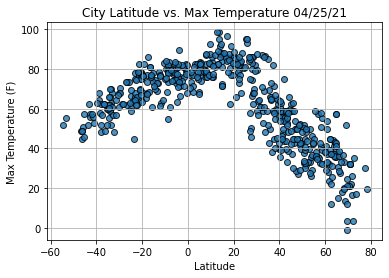

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/angelica_villanueva/Downloads/weather_data/Fig1.png")

# Show plot.
plt.show()

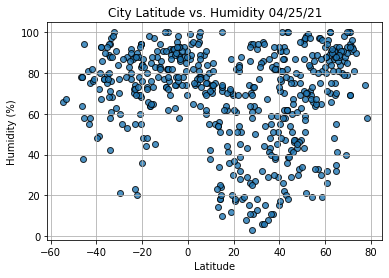

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/angelica_villanueva/Downloads/weather_data/Fig2.png")

# Show plot.
plt.show()

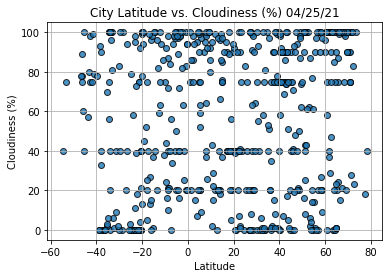

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/angelica_villanueva/Downloads/weather_data/Fig3.png")

# Show plot.
plt.show()

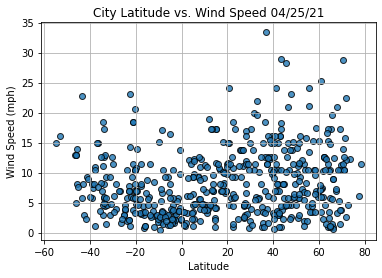

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/angelica_villanueva/Downloads/weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Araouane,ML,2021-04-25 21:47:15,18.9048,-3.5265,91.85,12,56,6.55
2,Kavaratti,IN,2021-04-25 21:47:16,10.5669,72.6420,83.71,72,2,6.73
3,Chokurdakh,RU,2021-04-25 21:47:16,70.6333,147.9167,21.02,94,100,13.98
4,Nanortalik,GL,2021-04-25 21:47:17,60.1432,-45.2371,41.14,80,100,15.26
5,Nouadhibou,MR,2021-04-25 21:47:17,20.9310,-17.0347,66.20,82,0,14.97
...,...,...,...,...,...,...,...,...,...
520,Stornoway,GB,2021-04-25 21:50:38,58.2093,-6.3865,51.01,87,100,3.44
521,Bulgan,MN,2021-04-25 21:50:38,48.8125,103.5347,29.35,75,97,15.03
522,Faya,SA,2021-04-25 21:46:46,18.3851,42.4509,62.60,72,40,9.89
523,Shaoyang,CN,2021-04-25 21:50:39,27.2315,111.4525,57.81,93,100,2.59


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Araouane,ML,2021-04-25 21:47:15,18.9048,-3.5265,91.85,12,56,6.55
2,Kavaratti,IN,2021-04-25 21:47:16,10.5669,72.6420,83.71,72,2,6.73
3,Chokurdakh,RU,2021-04-25 21:47:16,70.6333,147.9167,21.02,94,100,13.98
4,Nanortalik,GL,2021-04-25 21:47:17,60.1432,-45.2371,41.14,80,100,15.26
5,Nouadhibou,MR,2021-04-25 21:47:17,20.9310,-17.0347,66.20,82,0,14.97


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

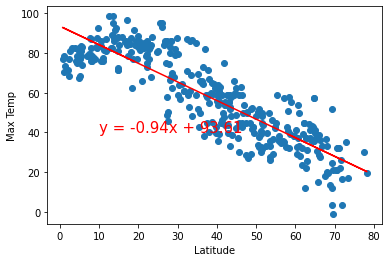

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

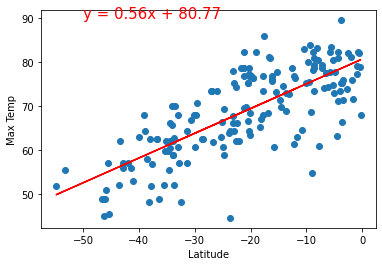

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

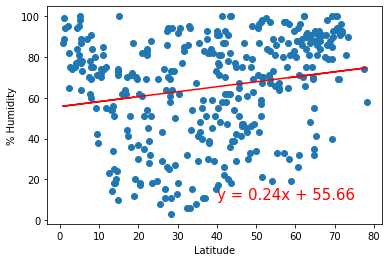

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

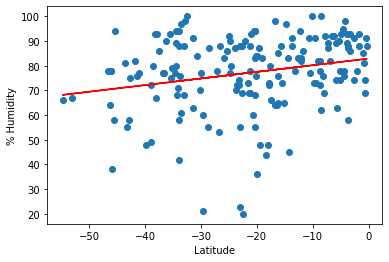

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for % Humidity", "% Humidity",(-50,15))

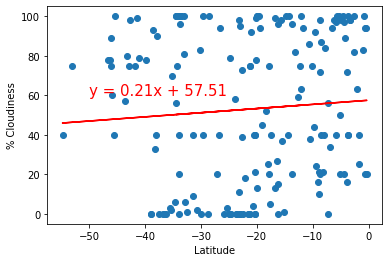

In [32]:
# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

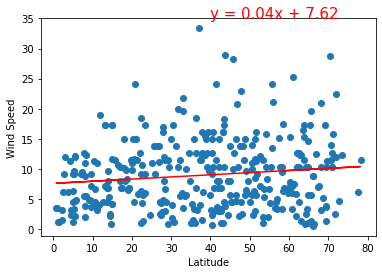

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

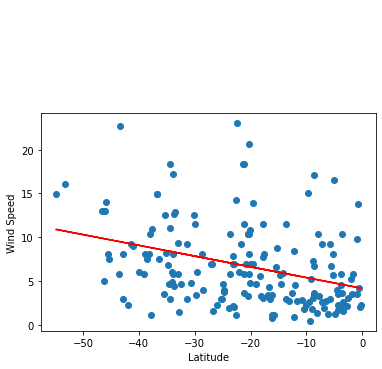

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))